# 插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 设置numpy浮点数显示格式

In [3]:
np.set_printoptions(precision=2,suppress=True)

In [5]:
data = np.genfromtxt("JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

In [6]:
for row in data[:7]:
    print( "{}\t{}".format(row['TK'], row['Cp']))
print ("...\t...")

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


In [7]:
# 绘图

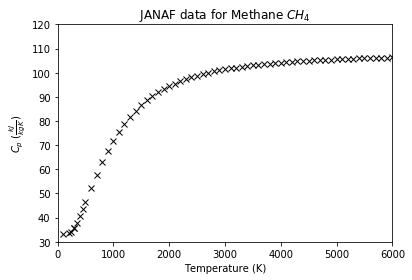

In [8]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

假设我们要对这组数据进行插值。

先导入一维插值函数 `interp1d`：

    interp1d(x, y)

In [9]:
from scipy.interpolate import interp1d

In [10]:
ch4_cp = interp1d(data['TK'],data['Cp'])

In [11]:
ch4_cp

In [12]:
ch4_cp(382.2)

array(39.57)

In [13]:
# 默认情况下，输入值要在插值允许的范围内，否则插值会报错：

In [14]:
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

In [15]:
# 可以通过参数设置允许超出范围
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False)

In [16]:
ch4_cp(8752)

array(nan)

In [18]:
# 使用指定的值代替这些非法值
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False, fill_value=-999.25)

In [19]:
ch4_cp

其基本思想是，已知相邻两点 $x_1,x_2$ 对应的值 $y_1,y_2$ ，那么对于 $(x_1,x_2)$ 之间的某一点 $x$ ，线性插值对应的值 $y$ 满足：点 $(x,y)$ 在 $(x_1,y_1),(x_2,y_2)$ 所形成的线段上。

In [20]:
# 应用线性插值

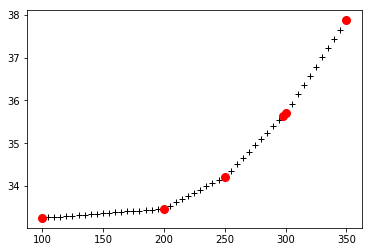

In [21]:
T=np.arange(100,355,5)
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

我们可以通过 `kind` 参数来调节使用的插值方法，来得到不同的结果：

- `nearest` 最近邻插值
- `zero` 0阶插值
- `linear` 线性插值
- `quadratic` 二次插值
- `cubic` 三次插值
- `4,5,6,7` 更高阶插值

最近邻插值：

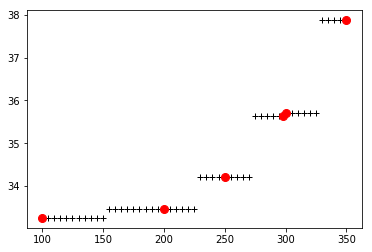

In [22]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="nearest")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

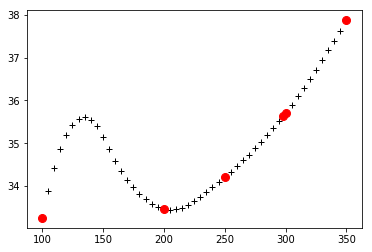

In [23]:
# 二次插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="quadratic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

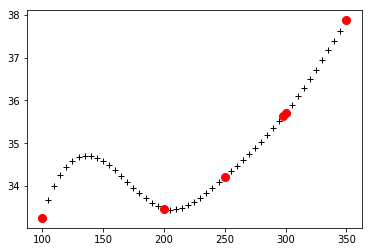

In [24]:
# 三次插值
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="cubic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

# 径向基函数
径向基函数，简单来说就是点 $x$ 处的函数值只依赖于 $x$ 与某点 $c$ 的距离：

$$\Phi(x,c) = \Phi(\|x-c\|)$$

In [25]:
x = np.linspace(-3,3,100)

常用的径向基（`RBF`）函数有：

高斯函数：

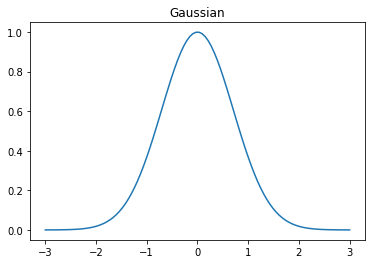

In [27]:
plt.plot(x, np.exp(-1 * x **2))
t = plt.title("Gaussian")

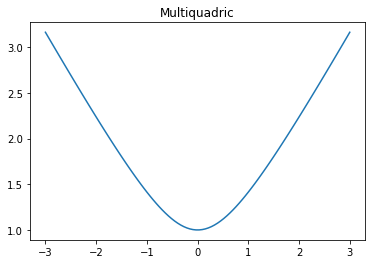

In [28]:
# Multiquadric 函数：
plt.plot(x, np.sqrt(1 + x **2))
t = plt.title("Multiquadric")

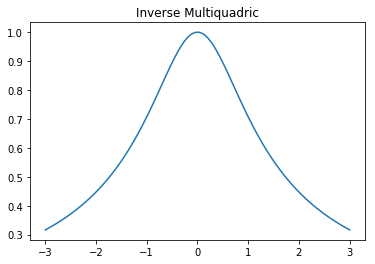

In [29]:
# Inverse Multiquadric 函数：
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

### 径向基函数插值
对于径向基函数，其插值的公式为：

$$
f(x) = \sum_j n_j \Phi(\|x-x_j\|)
$$

我们通过数据点 $x_j$ 来计算出 $n_j$ 的值，来计算 $x$ 处的插值结果。

In [30]:
from scipy.interpolate.rbf import Rbf

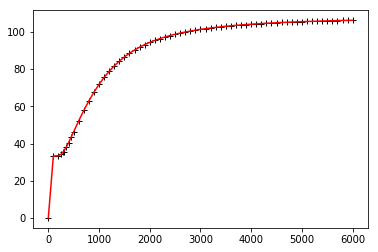

In [31]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

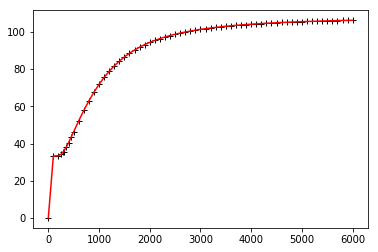

In [32]:
# 使用 gaussian 核：
cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

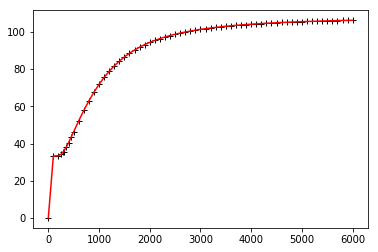

In [33]:
# 使用 nverse_multiquadric 核：
cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

In [34]:
# 高维 RBF 插值
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# 三维数据点
x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))

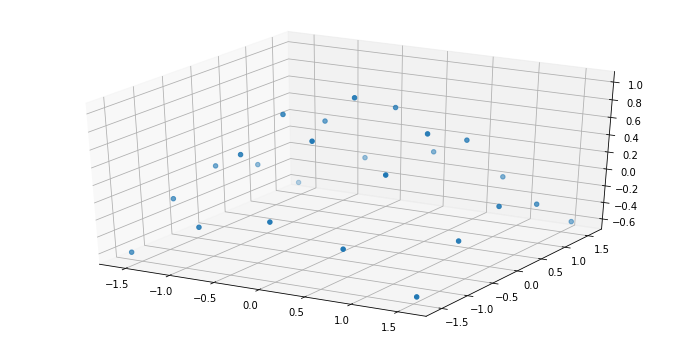

In [36]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.scatter(x,y,z)

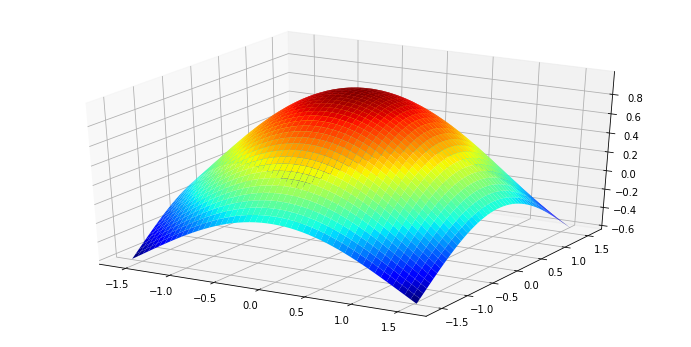

In [38]:
# 3维 `RBF` 插值：
zz = Rbf(x, y, z)
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)